## ReCell Supervised Learning (Linear Model)

## Problem Statement

### Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
#these packages provide the framework for completeing all data analysis/science tasks and visualizations 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#this package looks at all the columns in your dataframe and identifies possible cleaning tasks that need to be done, saving a massive amount of time and code.
from pandas_dq import dq_report as dqr

# this package allows you to split a dataset into a train section and test section
from sklearn.model_selection import train_test_split
# this package creates linear models
from sklearn.linear_model import LinearRegression
# this package analyzes the performance of your linear model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# to build linear regression_model using statsmodels
import statsmodels.api as sm
# this package lets you calculate the variable infration factors (VIF)for the varables in your models
from statsmodels.stats.outliers_influence import variance_inflation_factor

Imported pandas_dq (1.12). Always upgrade to get latest features.



- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Load Dataset/ Data overview

In [2]:
data= pd.read_csv('used_device_data.csv')
# take a preliminary look at the data and identify any obvious issues
print(data.head())
print(data.info())


  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2       

## Exploratory Data Analysis (EDA)

**Guiding Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

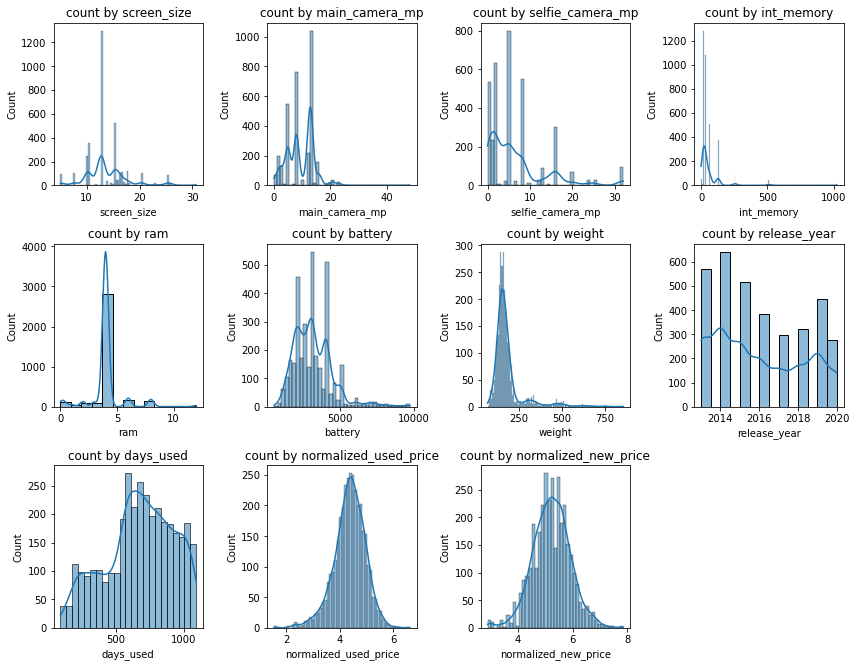

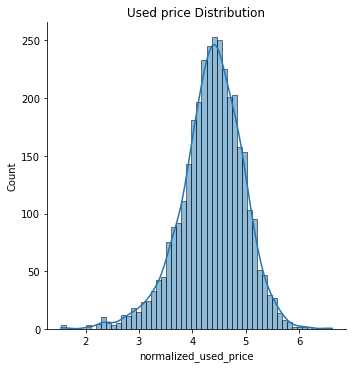

93.05


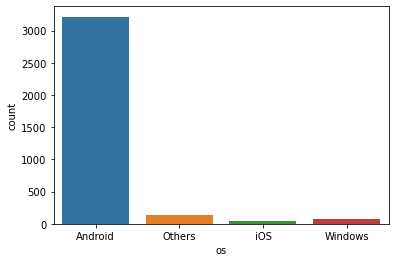

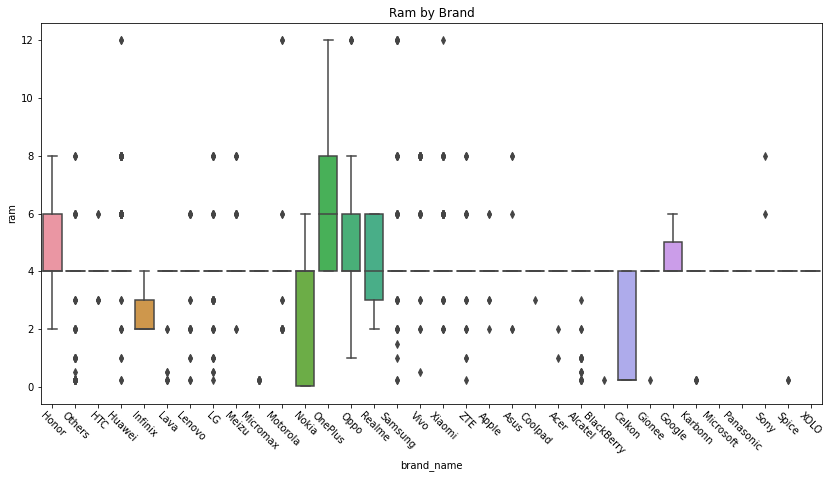

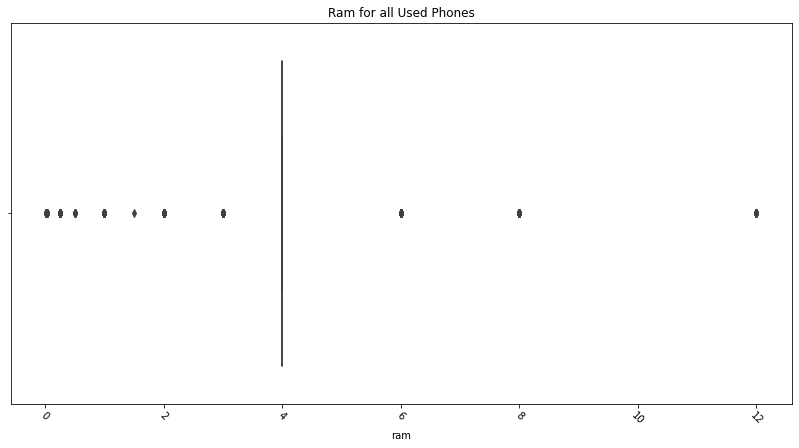

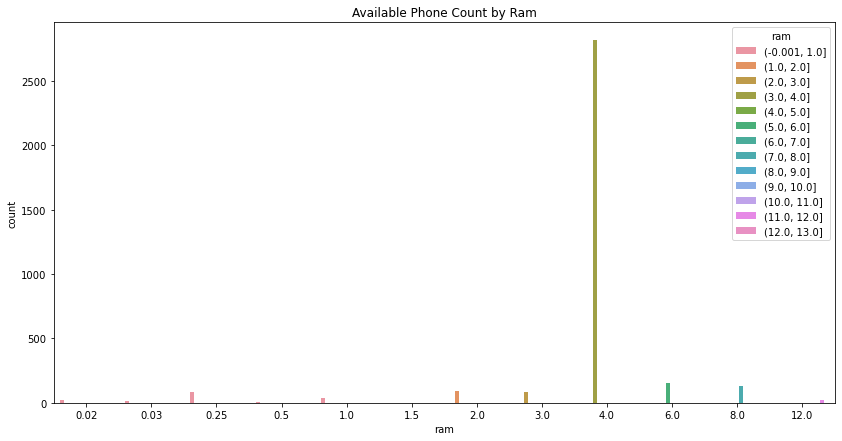

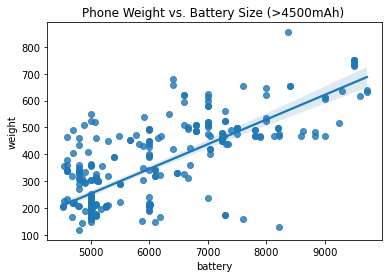

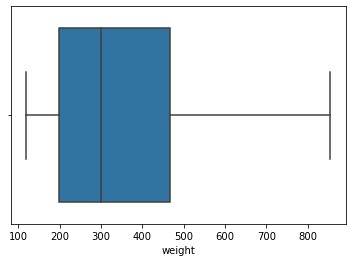

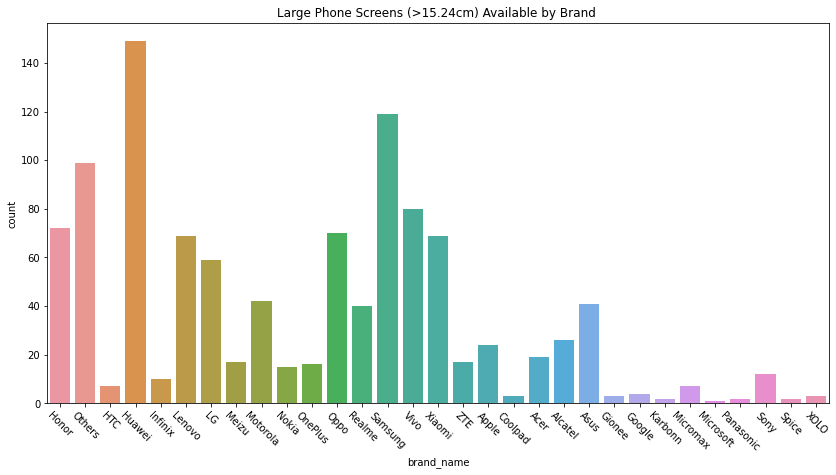

1099


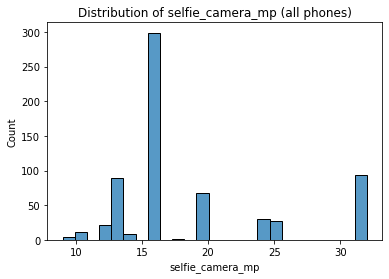

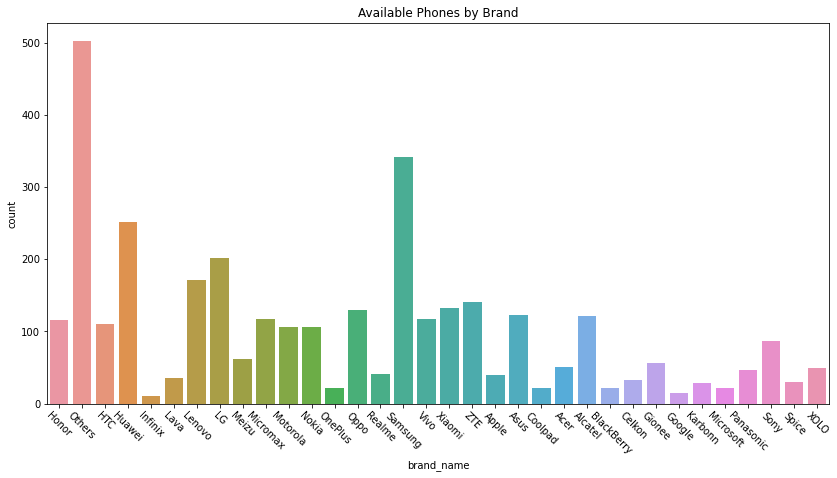

In [3]:
#This for loop creates a count plot for each numeric variable in the data set (univariate analysis)
numeric_columns= data.select_dtypes(include='number').columns
variables = data[numeric_columns]

fig = plt.figure(figsize=(12, 12))  # Set the figure size to 12x12 inches

for i, var in enumerate(variables):
    ax = fig.add_subplot(4, 4, i+1)  # Create a subplot for each variable
    sns.histplot(data=data, x=var, kde=True, ax=ax)
    ax.set_title('count by {}'.format(var))  # Set the title
    plt.tight_layout()    
    
    
#1. What does the distribution of normalized used device prices look like?
#this plot looks at this distribution 
sns.displot(data=data, x='normalized_used_price', kde=True)
plt.title('Used price Distribution')
plt.show()

#2 What percentage of the used device market is dominated by Android devices?
#This code calculates the percentage of the used market that is android devices.
percentage=sum(data['os']=='Android')/data['os'].count()*100
print(round(percentage,2))
sns.countplot(data=data, x='os')
plt.show()

#3 The amount of RAM is important for the smooth functioning of a device. 
#How does the amount of RAM vary with the brand?
#this code creates boxplots howing how ram varies by brand as well as for the used market as a whole.

plt.figure(figsize=(14,7))
sns.boxplot(data=data, x='brand_name', y='ram')
plt.xticks(rotation=-45)
plt.title('Ram by Brand')
plt.show()

plt.figure(figsize=(14,7))
sns.boxplot(data=data, x='ram')
plt.title('Ram for all Used Phones')
plt.xticks(rotation=-45)
plt.show()

#This plot looks at the total number of phones that have each ram value from 1-14 (vast majority have 4gb of ram)
#see how many phones in the df have each ram measurement
plt.figure(figsize=(14,7))
sns.countplot(data=data, x='ram', hue=pd.cut(data['ram'], bins=range(0, 14), include_lowest=True)) 
plt.title('Available Phone Count by Ram')
plt.show()

#4. A large battery often increases a device's weight, making it feel uncomfortable in the hands.
#How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
#This code graphs a scatterplot (and line of best fit) for the relationship between phone weight and battery size
bigbatt= data[data['battery']>4500]
sns.regplot(data=bigbatt, x='battery', y='weight')
plt.title("Phone Weight vs. Battery Size (>4500mAh) ")
plt.show()

sns.boxplot(data=bigbatt, x='weight')

#5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience.
#How many phones and tablets are available across different brands with a screen size larger than 6 inches?
bigscreen=data[data['screen_size']>15.24]
plt.figure(figsize=(14,7))
sns.countplot(data=bigscreen, x='brand_name')
plt.title('Large Phone Screens (>15.24cm) Available by Brand ')
plt.xticks(rotation=-45)
plt.show()

print(bigscreen['screen_size'].count())

#6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
#What is the distribution of devices offering greater than 8MP selfie cameras across brands?
nicecam=data[data['selfie_camera_mp']>8]
sns.histplot(data=nicecam, x='selfie_camera_mp')
plt.title('Distribution of selfie_camera_mp (all phones)')

plt.figure(figsize=(14,7))
sns.countplot(data=data, x='brand_name')
plt.xticks(rotation=-45)
plt.title('Available Phones by Brand')
plt.show()

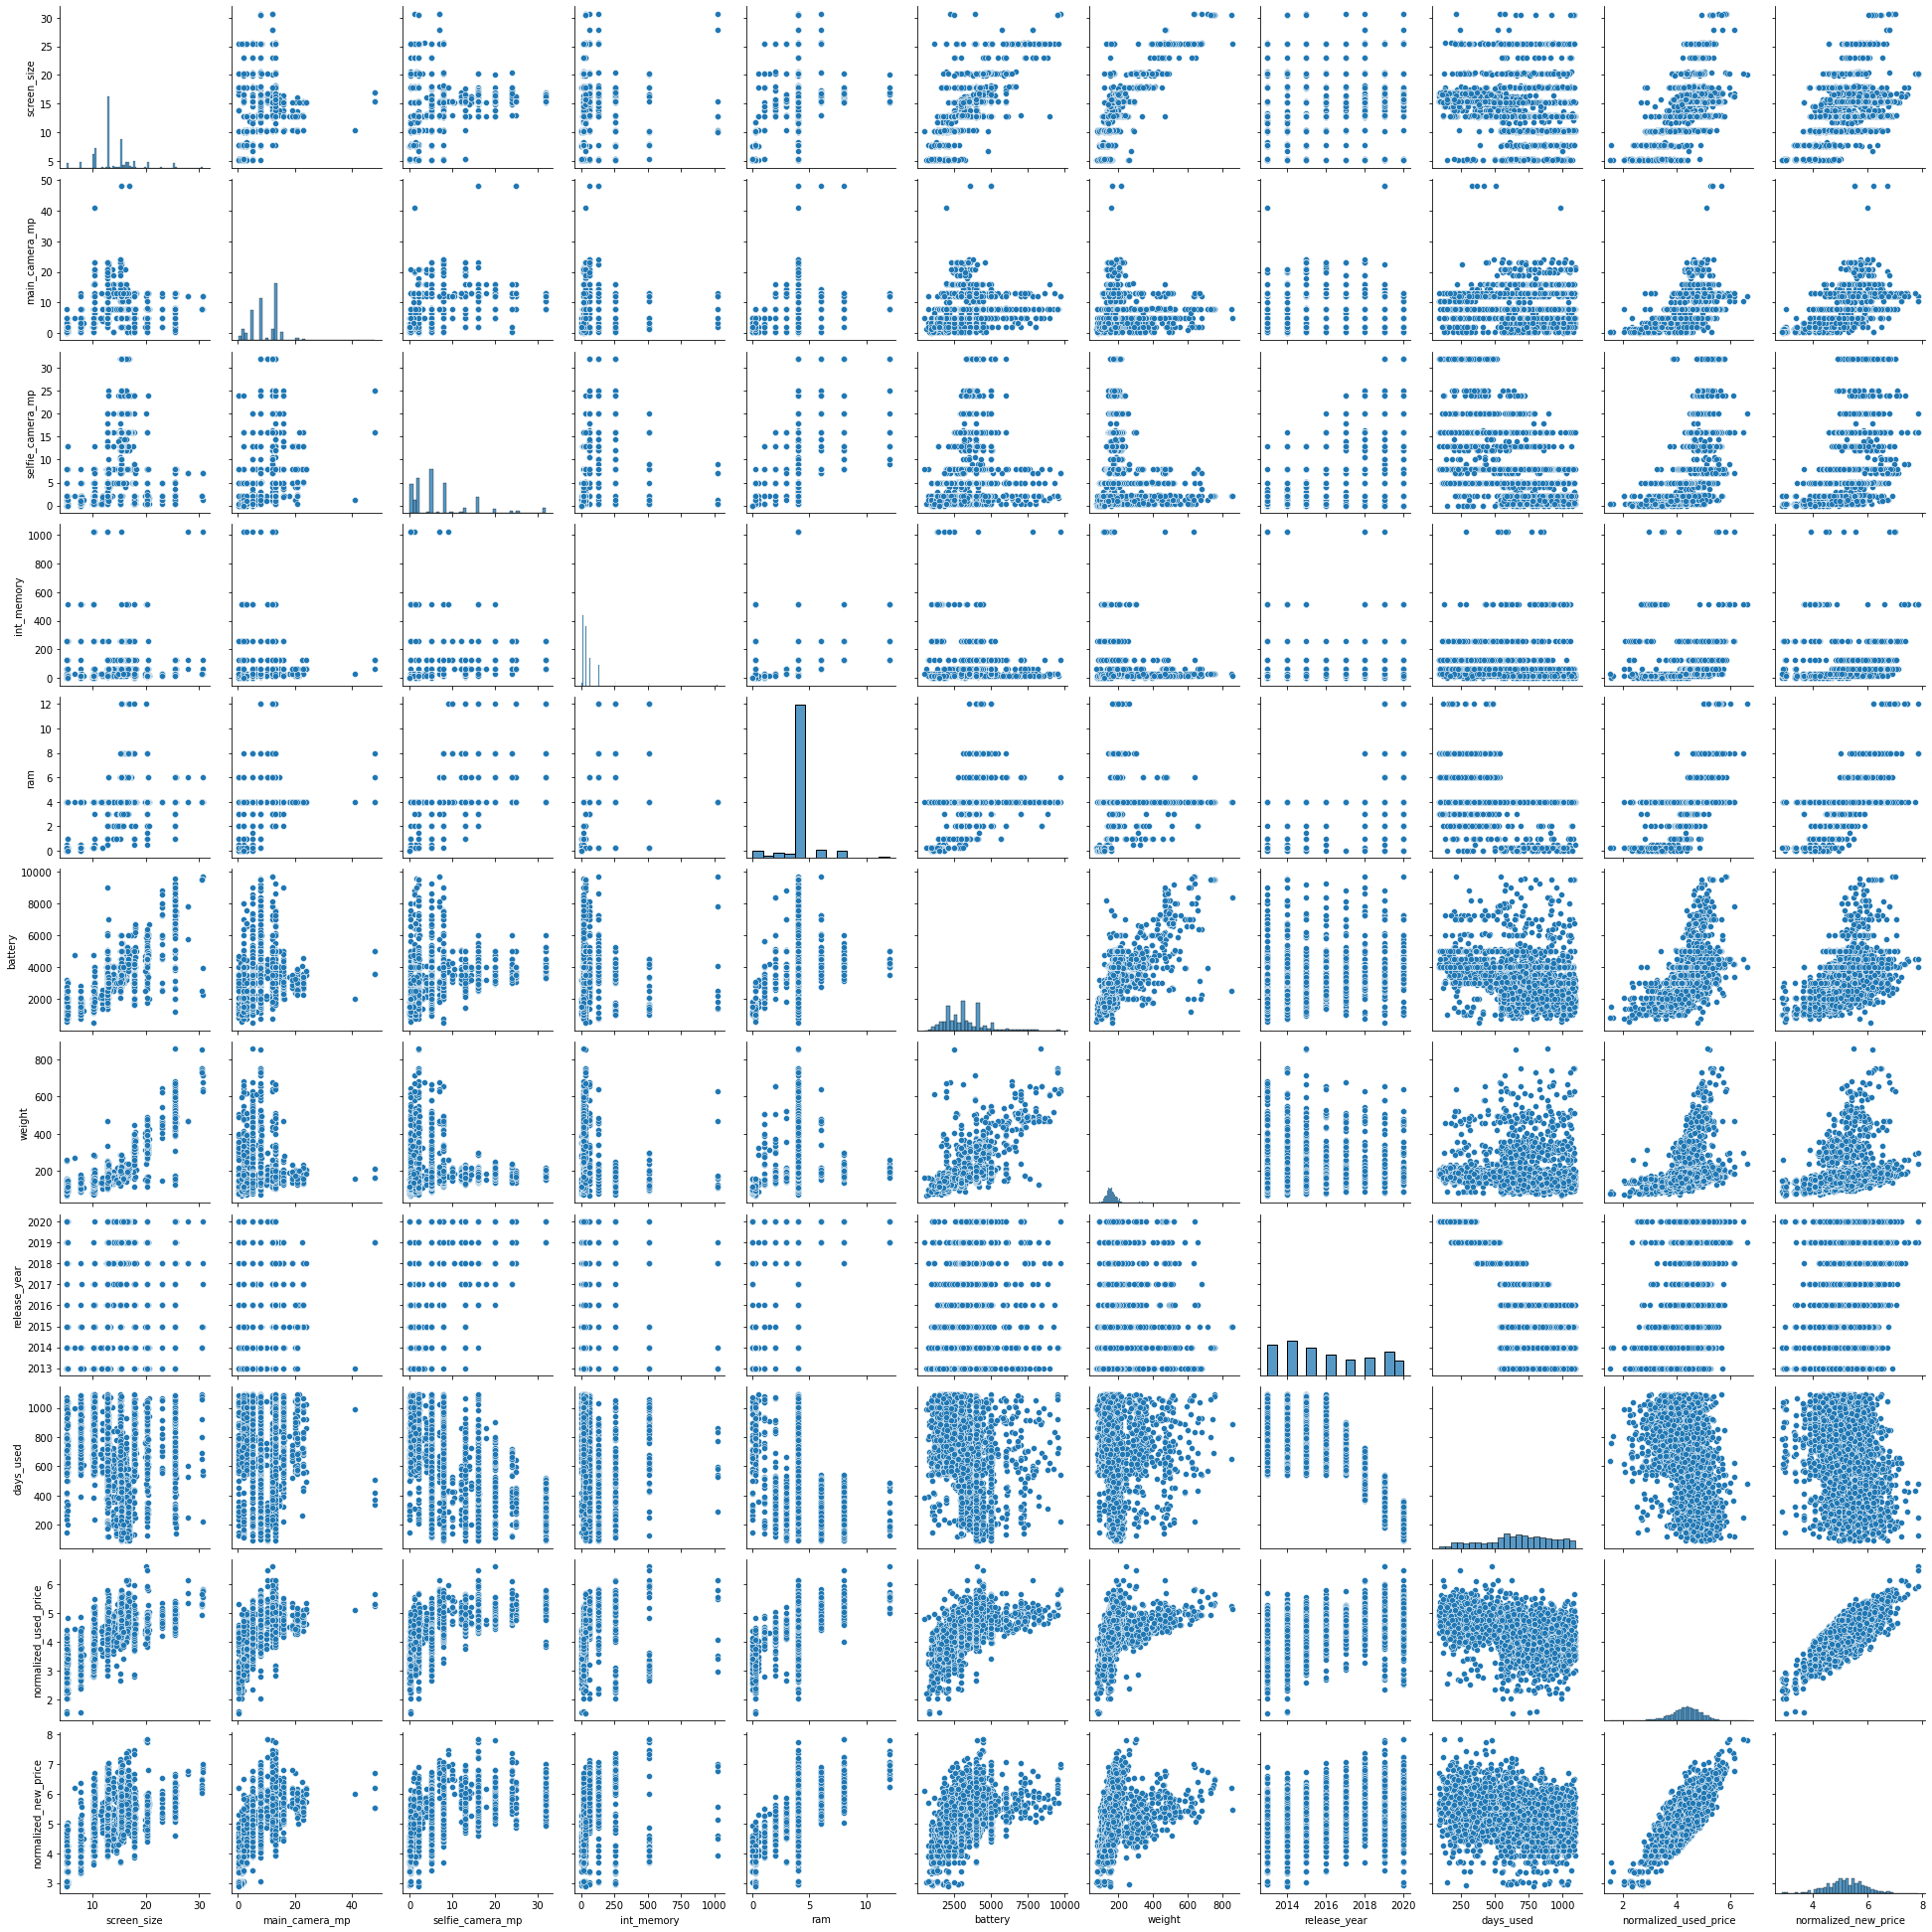

<AxesSubplot:title={'center':'Correlations Between Numerical Variables'}>

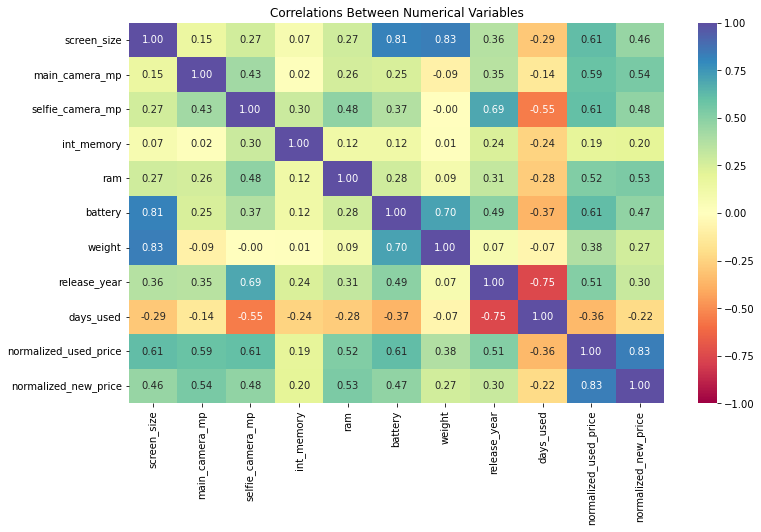

In [4]:
#7. Which attributes are highly correlated with the normalized price of a used device?
sns.pairplot(data)
plt.show()

#remove all categorical columns from df to look at correlation coeffecient between each numerical data column
data1=data[['screen_size','main_camera_mp','selfie_camera_mp','int_memory','ram', 'battery', 'weight', 'release_year', 'days_used','normalized_used_price','normalized_new_price' ]]
plt.figure(figsize=(12,7))
plt.title("Correlations Between Numerical Variables")
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

#### Observations
- 1.) Used prices have a normal distribution. 
- 2.) 93.5% of the used market are android devices.
- 3.)The amount of ram varies by brand but almost all brands  have a median of 4gb of ram 
- 4.)Weight varies for phones with batteries larger than 4500mhz but there is a clear positive correlation between battery size and phone weight.  75% of phones with these large batteries are between 200-475 grams
- 5.)Samsung, Huawei, and LG have the most large screened phones available on the used market but other brands also have used phones with large screens available.
- 6.)The distribution of selfie_camera_mps above 8mp is not normal and most phones in this category have just over 15mp selfie cameras
- 7.)The variables listed below are correlated with normalized used price
    - Screen Size
    - Main camera mp
    - Selfie camera mp
    - Ram
    - Battery (size)
    - Release Year
    - Normalized_new_price

### Data Cleaning

In [5]:
#Overview
data.info()

#this pandas package and function imported above automatically looks for issues in each of your columns and give recommendations on how to deal with them.
result= dqr(data=data, csv_engine='pandas', verbose=1)

#Find out why there are only 3275 values for main_camera_mp column
nullmain_df = data[data['main_camera_mp'].isnull()]
nullmain_count = data['main_camera_mp'].isnull().sum()

print(nullmain_df.count())
print(3454-179)

#find out why there are only 3452 values for main_camera_mp column
nullselfie_df = data[data['selfie_camera_mp'].isnull()]
nullselfie_count = data['selfie_camera_mp'].isnull().sum()

print(nullselfie_df.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
brand_name,object,0.000000,0,Acer,ZTE,30 rare categories: Too many to list. Group them into a single category or drop the categories.
os,object,0.000000,0,Android,iOS,"3 rare categories: ['Others', 'Windows', 'iOS']. Group them into a single category or drop the categories."
screen_size,float64,0.000000,NA,5.080000,30.710000,has 450 outliers greater than upper bound (19.3) or lower than lower bound(8.739999999999998). Cap them or remove them.
4g,object,0.000000,0,no,yes,No issue
5g,object,0.000000,0,no,yes,1 rare categories: ['yes']. Group them into a single category or drop the categories.
main_camera_mp,float64,5.182397,NA,0.080000,48.000000,"179 missing values. Impute them with mean, median, mode, or a constant value such as 123., has 5 outliers greater than upper bound (25.0) or lower than lower bound(-7.0). Cap them or remove them."
selfie_camera_mp,float64,0.057904,NA,0.000000,32.000000,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., has 221 outliers greater than upper bound (17.0) or lower than lower bound(-7.0). Cap them or remove them."
int_memory,float64,0.115808,NA,0.010000,1024.000000,"4 missing values. Impute them with mean, median, mode, or a constant value such as 123., has 138 outliers greater than upper bound (136.0) or lower than lower bound(-56.0). Cap them or remove them."
ram,float64,0.115808,NA,0.020000,12.000000,"4 missing values. Impute them with mean, median, mode, or a constant value such as 123., has 635 outliers greater than upper bound (4.0) or lower than lower bound(4.0). Cap them or remove them."
battery,float64,0.173712,NA,500.000000,9720.000000,"6 missing values. Impute them with mean, median, mode, or a constant value such as 123., has 77 outliers greater than upper bound (6850.0) or lower than lower bound(-750.0). Cap them or remove them., has a high correlation with ['screen_size']. Consider dropping one of them."


brand_name               179
os                       179
screen_size              179
4g                       179
5g                       179
main_camera_mp             0
selfie_camera_mp         179
int_memory               179
ram                      179
battery                  179
weight                   179
release_year             179
days_used                179
normalized_used_price    179
normalized_new_price     179
dtype: int64
3275
brand_name               2
os                       2
screen_size              2
4g                       2
5g                       2
main_camera_mp           2
selfie_camera_mp         0
int_memory               2
ram                      2
battery                  2
weight                   2
release_year             2
days_used                2
normalized_used_price    2
normalized_new_price     2
dtype: int64


 #### Observations:
- We can see that most of our columns have less than 1% of their values missing. For these columns we can simply calculate the mean of that variable and replace the NaNs with the mean. This is ok because their arent many missing values and this change wont drastically skew the data one way or another
- In the case of the main_camera_mp column, more than 5 % of the rows have NaN values.  In the real world we would need to investigate if this was for phones that didnt have selfie cameras, or the info was simply missing and there are true values. However in this case study I am making the executive decision to replace these values with the median.
- We can see that many of the columns have a great number of outliers below and above the upper bounds of their distribution.  That being said we definitely shouldn't drop these as these outliers will be important in building an accurate model.
- Lastly we see high correlation between a number of the variables. We will likely need to drop a number of them when building our model as they arent independent of one another.  

In [6]:
#Here we will replace missing values with the medians for that variables existing values. For example, if a 'ram' value is missing from 5 of the google phones, i am taking the median 'ram' value from all other google phones and replacing the NaNs with that 

for _ in range(2):

#Create a copy of the data to avoid damage to original 
    data1 = data.copy()

#replace NaNs in the "main_camera_mp" column with the average "main_camera_mp" of other phones from that brand.
data1["main_camera_mp"] = data1["main_camera_mp"].fillna(
    value=data1.groupby(["brand_name"])["main_camera_mp"].transform("median"))

#after doing this we can see that their are still 10 Infinix phones with no existing main camera mp values. I am going to drop these phones from the dataset because their is no main_camera_mp data on any of them and therfore we cannot assume anything about this data.  
data1[data1['brand_name']=='Infinix']
data1 = data1[data1['brand_name'] != 'Infinix']



#replace NaNs in the "selfie_camera_mp" column with the median "selfie_camera_mp" of other phones from that brand.
data1["selfie_camera_mp"] = data1["selfie_camera_mp"].fillna(
    value=data1.groupby(["brand_name"])["selfie_camera_mp"].transform("median"))

#replace NaNs in the "int_memory" column with the median "int_memory" of other phones from that brand.
data1['int_memory']= data1['int_memory'].fillna(
    value=data1.groupby(['brand_name'])['int_memory'].transform('median'))

#replace NaNs in the "ram" column with the median "ram" of other phones from that brand.
data1['ram']= data1['ram'].fillna(
    value=data1.groupby(['brand_name'])['ram'].transform('median'))

#replace NaNs in the "battery" column with the median "battery" value of other phones from that brand.
data1['battery']= data1['battery'].fillna(
    value=data1.groupby(['brand_name'])['battery'].transform('median'))

#replace the NaNs in the 'weight' column with the median weight value for that respective brand 
data1['weight']= data1['weight'].fillna(
    value=data1.groupby(['brand_name'])['weight'].transform('median'))

data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3444 non-null   object 
 1   os                     3444 non-null   object 
 2   screen_size            3444 non-null   float64
 3   4g                     3444 non-null   object 
 4   5g                     3444 non-null   object 
 5   main_camera_mp         3444 non-null   float64
 6   selfie_camera_mp       3444 non-null   float64
 7   int_memory             3444 non-null   float64
 8   ram                    3444 non-null   float64
 9   battery                3444 non-null   float64
 10  weight                 3444 non-null   float64
 11  release_year           3444 non-null   int64  
 12  days_used              3444 non-null   int64  
 13  normalized_used_price  3444 non-null   float64
 14  normalized_new_price   3444 non-null   float64
dtypes: f

### Feature Engineering: 
##### Convert the 'release_year' column to 'age'
We want to know how a phones age affects its price on the used market, therefore I will convert the release year info in to a simple age as this number will be easier to interpret during our analysis.

In [7]:
#remember that the data was collected in 2021
data1['age']= 2021-data1['release_year']
data1.drop('release_year', inplace=True, axis=1)

### Outlier Detection

Number of outliers in screen_size: 450
Number of outliers in main_camera_mp: 5
Number of outliers in selfie_camera_mp: 221
Number of outliers in int_memory: 138
Number of outliers in ram: 627
Number of outliers in battery: 77
Number of outliers in weight: 368
Number of outliers in days_used: 0
Number of outliers in normalized_used_price: 85
Number of outliers in normalized_new_price: 66
Number of outliers in age: 0


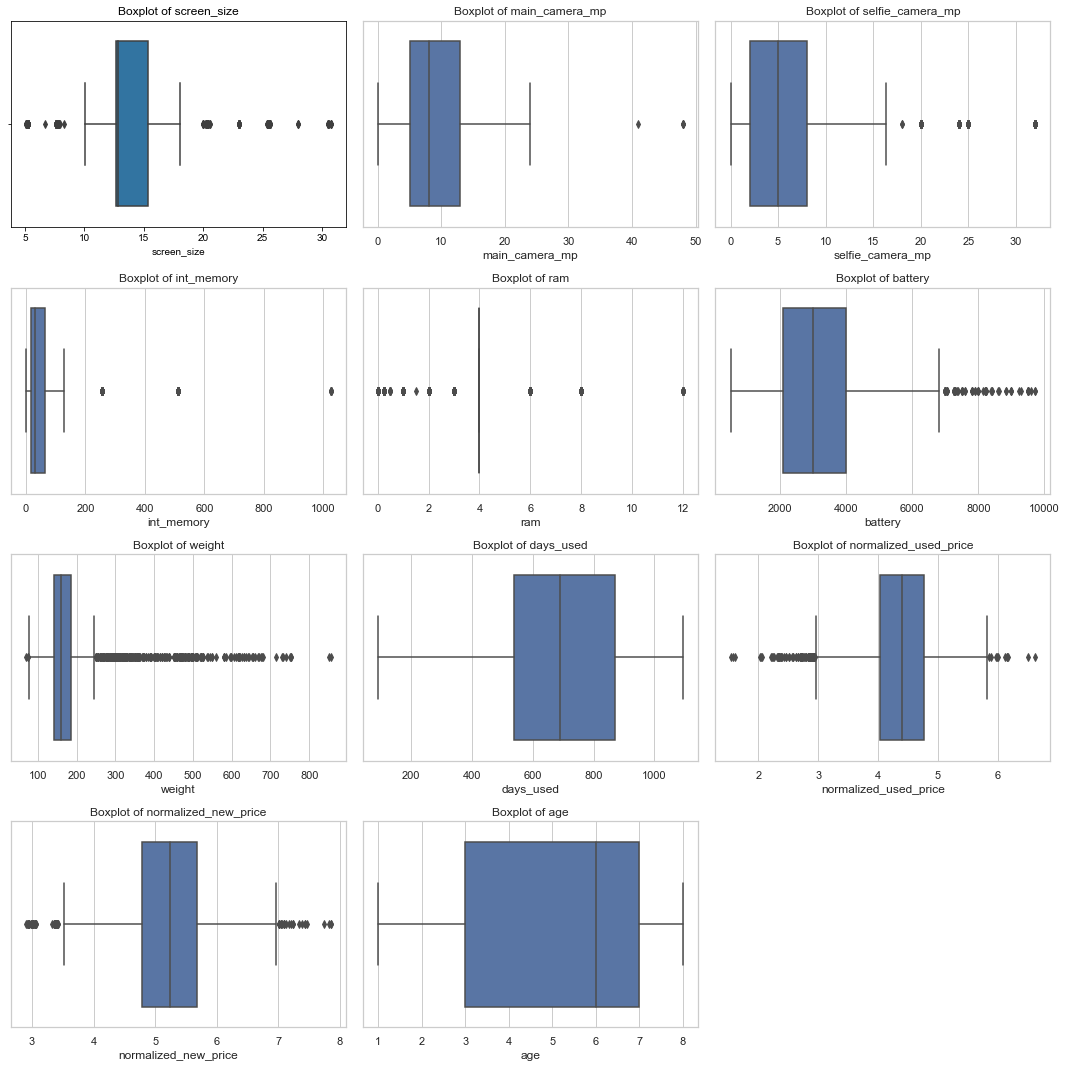

In [8]:
#Create list of all numerical variables
numerical_vars = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price', 'age']

#create an empty space to store your variables 
plt.figure(figsize=(15, 15))
num_plots = len(numerical_vars)

# Iterate over each numerical variable and create a boxplot for each that shows outliers
for i, var in enumerate(numerical_vars):
    plt.subplot(4, 3, i+1)
    # Create a boxplot to visualize the distribution and outliers
    sns.boxplot(x=data1[var])
    sns.set(style="whitegrid")
    plt.title(f"Boxplot of {var}")

    # Calculate the IQR for variable
    q1 = data1[var].quantile(0.25)
    q3 = data1[var].quantile(0.75)
    iqr = q3 - q1

    # Define the upper and lower bounds 
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Count the number of outliers for the variable
    num_outliers = len(data1[(data1[var] < lower_bound) | (data1[var] > upper_bound)])
    print(f"Number of outliers in {var}: {num_outliers}")

plt.tight_layout()
plt.show()

In [9]:
#investigate the 5 outliers out of 3444 total datapoints for the main_camera_mp variable
data1[data1['main_camera_mp']>30]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,age
210,ZTE,Android,16.89,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,336,5.668052,6.708780,2
215,ZTE,Android,16.89,yes,no,48.0,16.0,64.0,6.0,5000.0,215.0,506,5.263726,6.217723,2
2097,Nokia,Windows,10.29,yes,no,41.0,1.2,32.0,4.0,2000.0,158.0,988,5.105097,5.989287,8
3240,Motorola,Android,15.34,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,371,5.325933,5.541224,2
3381,Motorola,Android,15.34,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,422,5.331027,5.541224,2


#### Observations:
- Every single one of our numerical variables, with the exception of age and days used, contains outliers.  Some of the variables contain a massive number of them. For this reason, most should not be removed as they show the variablility of the data and are not all that uncommon or out of the ordinary.
- I considered removing the 5 outliers for the main_camera_mp variables as I thought they could be mistakes but after some simple google searches I realized that ZTE, Nokia, and Motorola all do make phones with very high main camera MP and therefore I can't remove these rows.

### Prepare for modeling
- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance


In [10]:
# Create X and y variables
X = data1.drop(["normalized_used_price"], axis=1)
y = data1["normalized_used_price"]

In [11]:
# This code essentially adds the b in a linear y=mx +b equation.  It adds the y-intercept to your linear model even if all other coefficients=0
X = sm.add_constant(X)

In [12]:
# Add dummy variables for the categorical columns that are of data type 'object' or 'category'.  It does this for all categorical variables all at once.
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [13]:
#split your data into a train and test group based 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(x_train.shape[0])
print(x_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2410
1034
2410
1034


## EDA (Post Datacleaning)
#### Univariate Analysis

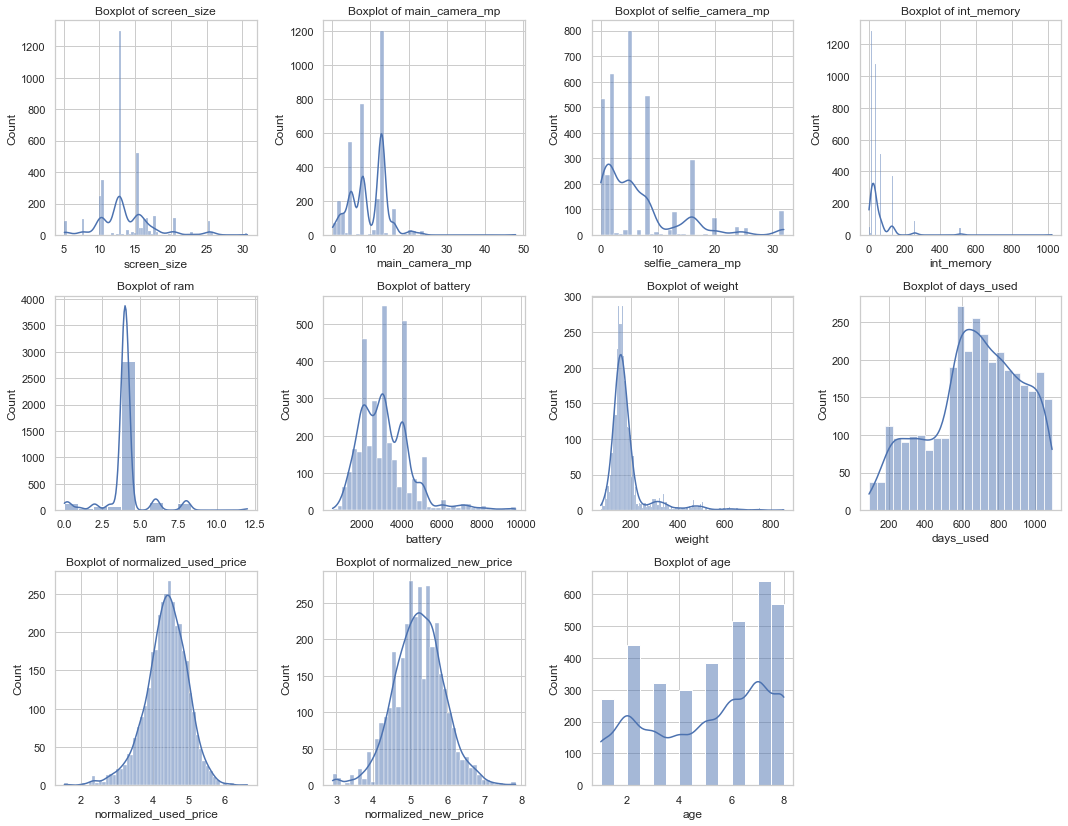

In [14]:
numerical_vars = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price', 'age']

#create an empty space to store your variables 
plt.figure(figsize=(15, 15))
num_plots = len(numerical_vars)

#Iterate over each numerical variable and create a boxplot for each that shows outliers
for i, var in enumerate(numerical_vars):
    plt.subplot(4, 4, i+1)
    # Create a boxplot to visualize the distribution and outliers
    sns.histplot(x=data1[var], kde=True)
    sns.set(style="whitegrid")
    plt.title(f"Boxplot of {var}")
plt.tight_layout()
plt.show()

#### Multivariate Analysis

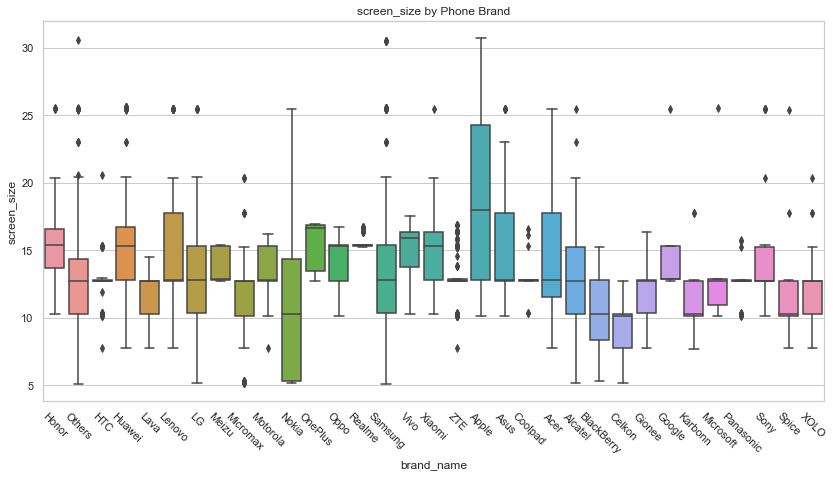

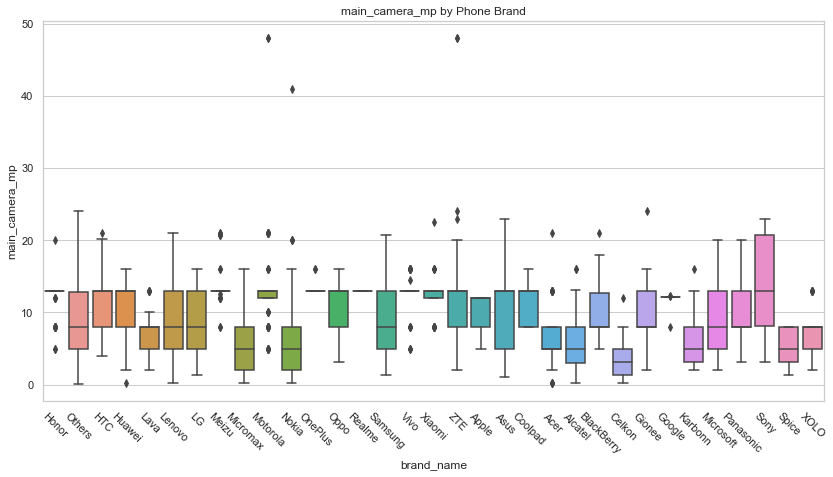

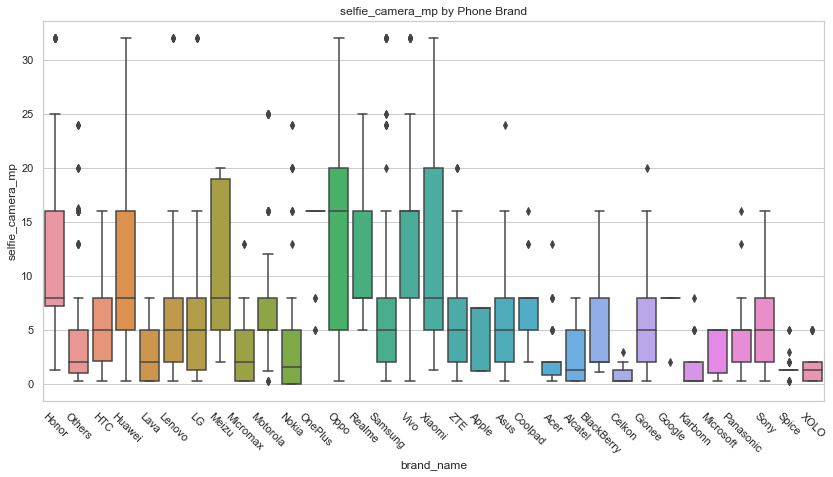

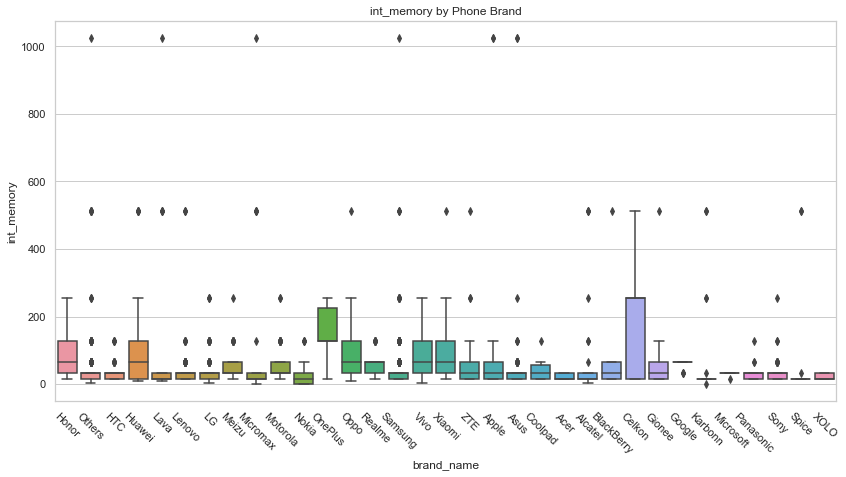

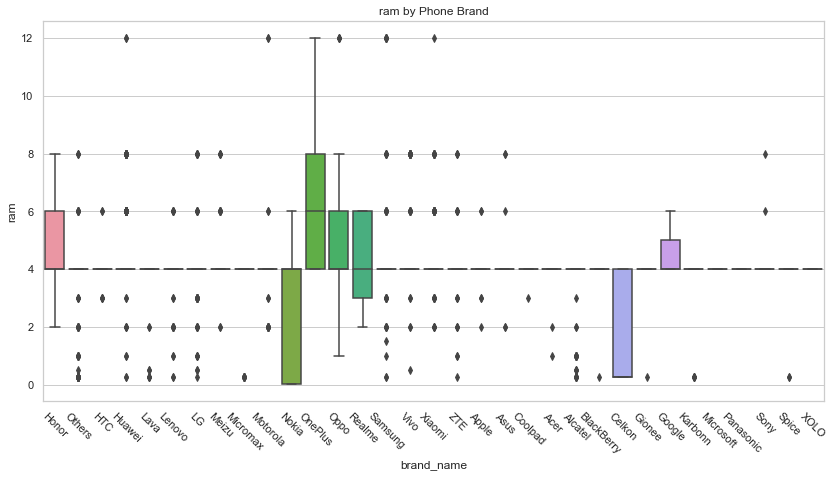

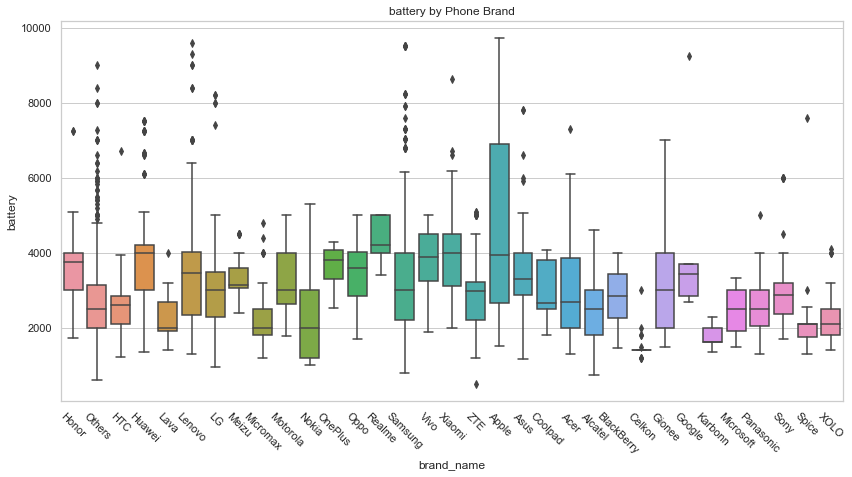

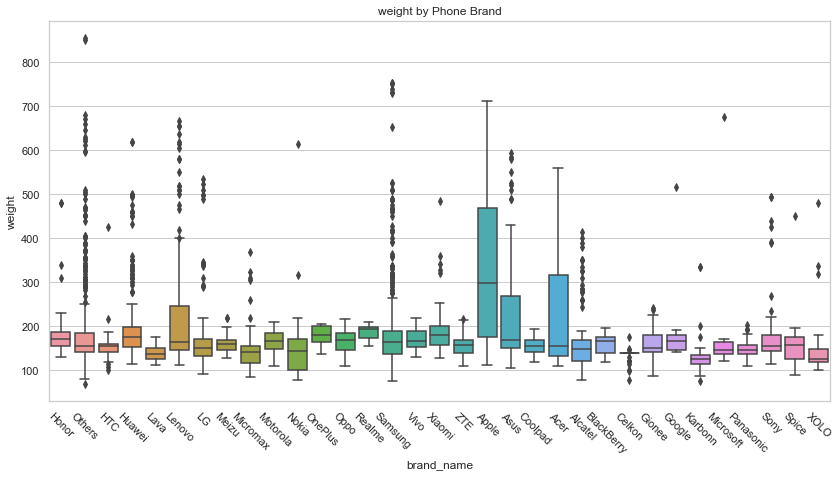

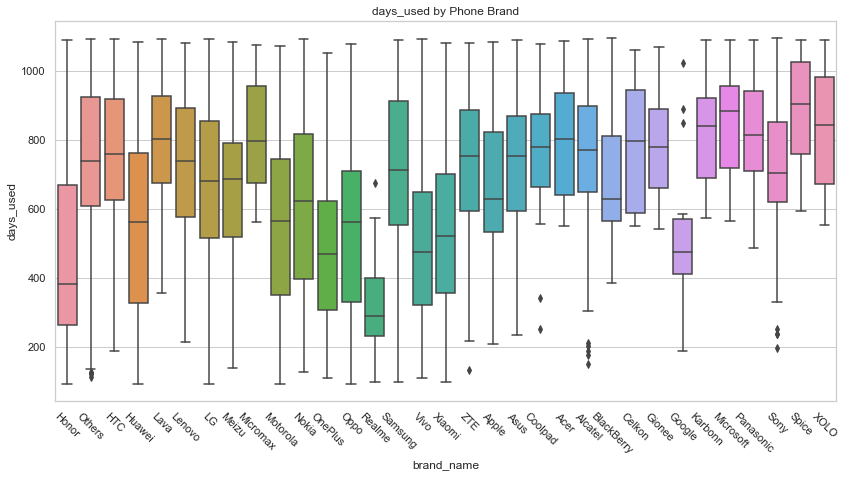

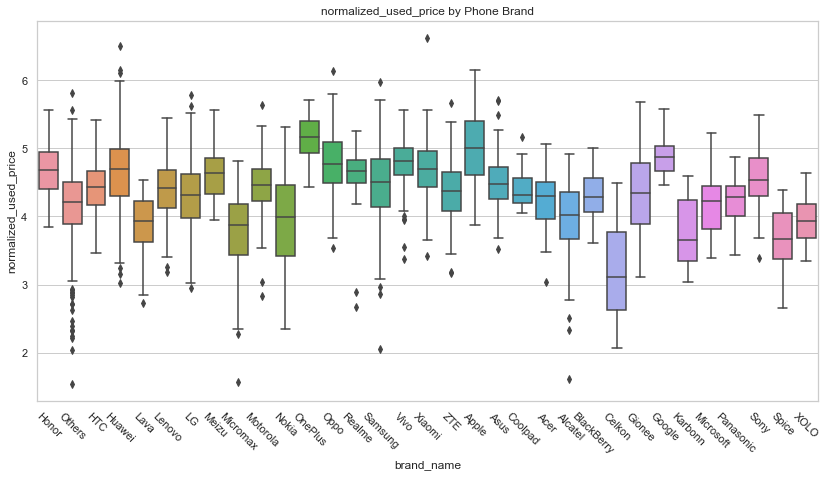

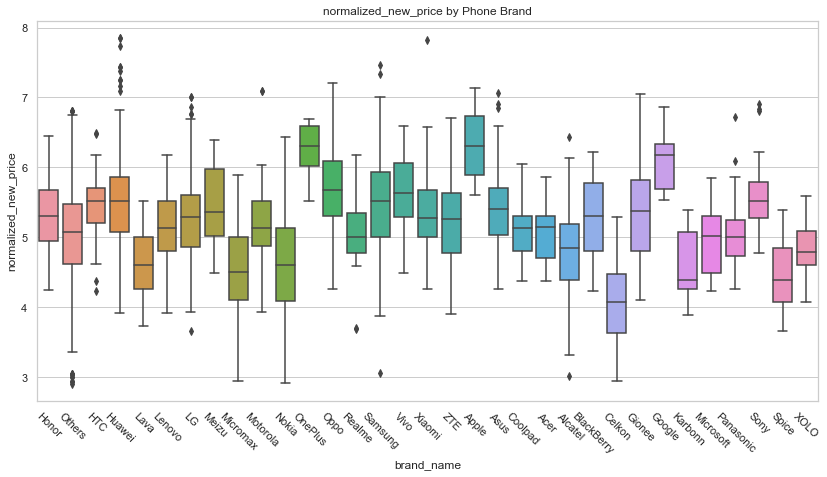

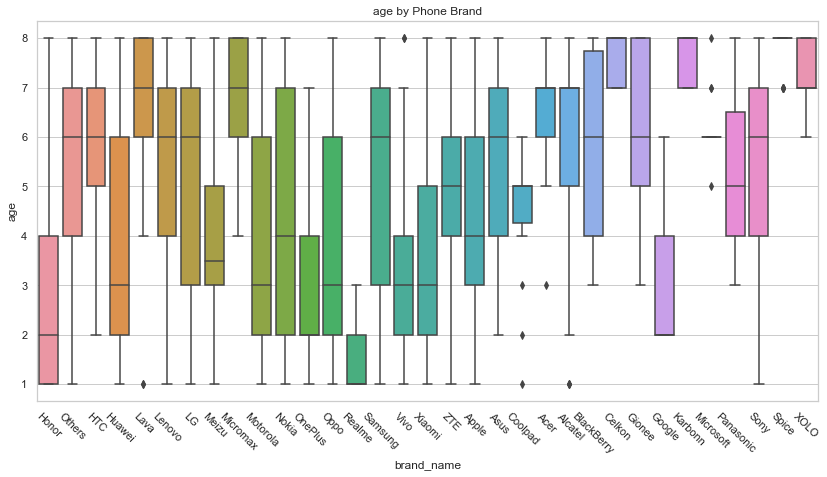

In [15]:
numerical_vars = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'days_used', 'normalized_used_price', 'normalized_new_price', 'age']

for var in numerical_vars:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=data1, x='brand_name', y=var)
    plt.title(f"{var} by Phone Brand")
    plt.xticks(rotation=-45)
    plt.show()

#### Observations
- The distributions of numeric variables didn't change much with data cleaning.  Only normalized new/used price variables follow a normal distribution
- These boxplots give us interesting insights into the distribution of the numeric variables across all the different brands.  These could be used to answer questions about specific brands but I do not see anything that immidiately jumps out at me as important to address.

In [16]:
hey= dqr(data=data1, csv_engine='pandas', verbose=1)

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
brand_name,object,0.000000,0,Acer,ZTE,29 rare categories: Too many to list. Group them into a single category or drop the categories.
os,object,0.000000,0,Android,iOS,"3 rare categories: ['Others', 'Windows', 'iOS']. Group them into a single category or drop the categories."
screen_size,float64,0.000000,NA,5.080000,30.710000,has 450 outliers greater than upper bound (19.3) or lower than lower bound(8.739999999999998). Cap them or remove them.
4g,object,0.000000,0,no,yes,No issue
5g,object,0.000000,0,no,yes,1 rare categories: ['yes']. Group them into a single category or drop the categories.
main_camera_mp,float64,0.000000,NA,0.080000,48.000000,has 5 outliers greater than upper bound (25.0) or lower than lower bound(-7.0). Cap them or remove them.
selfie_camera_mp,float64,0.000000,NA,0.000000,32.000000,has 221 outliers greater than upper bound (17.0) or lower than lower bound(-7.0). Cap them or remove them.
int_memory,float64,0.000000,NA,0.010000,1024.000000,has 138 outliers greater than upper bound (136.0) or lower than lower bound(-56.0). Cap them or remove them.
ram,float64,0.000000,NA,0.020000,12.000000,has 627 outliers greater than upper bound (4.0) or lower than lower bound(4.0). Cap them or remove them.
battery,float64,0.000000,NA,500.000000,9720.000000,"has 77 outliers greater than upper bound (6850.0) or lower than lower bound(-750.0). Cap them or remove them., has a high correlation with ['screen_size']. Consider dropping one of them."


## Model Building - Linear Regression

In [17]:
#This code creates a linear model 
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.846
Model:                               OLS   Adj. R-squared:                  0.843
Method:                    Least Squares   F-statistic:                     275.8
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           18:50:49   Log-Likelihood:                 80.997
No. Observations:                   2410   AIC:                            -65.99
Df Residuals:                       2362   BIC:                             211.8
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Observations
- The R squared value of 0.846 on this original training model is great as it indicates that 85% of the data can be explained by the model
- The high P-values of many of the predictor variables used in the model indicates that many of them should likely be removed from the model as that dont significantly effect the R squared value.  We will do this after checking for and removing multicolliniarity 
- We can see we have a constant of 1.28 in the case that all our predictor variable coeffecients were 0

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [18]:
#This entire code chunk combines several functions to calculare RMSE, MAE, r squared, adjusted r-squared, and MAPE

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [19]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233974,0.181465,0.845867,0.842734,4.380732


In [20]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229577,0.179787,0.840412,0.832635,4.270302


#### Observations
- The RMSE is lower for the model using test data than the model using the training data. 
- The R squared value for the test data is almost the same as the training model but slightly smaller.  
- These are both great signs as it tells us that the model created using our training data still matches well with our testing data, indicating the model is not overfit

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Multicollinearity Test 

In [21]:
#Function checking for VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [22]:
checking_vif(x_train) 

,feature,VIF
0,const,218.795249
1,screen_size,7.729621
2,main_camera_mp,2.330059
3,selfie_camera_mp,2.891093
4,int_memory,1.372100
5,ram,2.270635
6,battery,4.610533
7,weight,6.089586
8,days_used,2.559045
9,normalized_new_price,3.118523


#### Observations
- We can see that the VIF values are high for 'screen_size', 'battery', 'weight' and 'age' columns. Therefore we will calculate the adjusted R squared for the model in the event that we dropped each of these columns from the data. The function below completes this all at once
- Although some of the dummy variables also have high VIFs the others are low enough that we can leave these unchanged. 

In [23]:
#This function will take columns with high VIF values and calculate the adjusted R squared and RMSE if they were dropped from the dataset. This is done individually for each dropped column. 
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [24]:
#this code identifies columns with high VIF and calculates the adjusted r squared if they were dropped.
col_list = ['screen_size', 'battery', 'weight', 'age'] 
res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,battery,0.842154,0.236824
1,age,0.840803,0.237836
2,weight,0.839132,0.239081
3,screen_size,0.839072,0.239125


#### Observations
- The adjusted R squared of battery has the smallest difference from the adjusted R squared of our original model so we will drop it. 
- Dummy variables mostly have VIFs lower than 5 therefore even the dummy variables with VIF higher than 5 will be left alone as per MLS

In [25]:
#This code drops the column with high VIF that doesnt influence adj R squared
col_to_drop1 = 'battery' 
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop1)] 
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop1)] 

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop1)
vif

VIF after dropping  battery


,feature,VIF
0,const,218.619264
1,screen_size,6.963580
2,main_camera_mp,2.310801
3,selfie_camera_mp,2.889822
4,int_memory,1.371767
5,ram,2.270534
6,weight,5.511804
7,days_used,2.556162
8,normalized_new_price,3.103439
9,age,4.589911


In [26]:
#this code identifies columns with high VIF and calculates the adjusted r squared if they were dropped.
col_list2 = ['screen_size', 'weight', 'age'] 
res2 = treating_multicollinearity(x_train2, y_train, col_list2) 
res2

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,age,0.840472,0.238083
1,weight,0.839132,0.239081
2,screen_size,0.839081,0.239118


In [27]:
#This code drops the column with high VIF that doesnt influence adj R squared
col_to_drop2 = 'age' 
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop2)] 
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop2)] 
# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop2)
vif

VIF after dropping  age


,feature,VIF
0,const,212.762525
1,screen_size,6.600658
2,main_camera_mp,2.289867
3,selfie_camera_mp,2.538258
4,int_memory,1.355886
5,ram,2.268873
6,weight,5.419869
7,days_used,1.837684
8,normalized_new_price,2.892382
9,brand_name_Alcatel,3.247915


In [28]:
#this code identifies columns with high VIF and calculates the adjusted r squared if they were dropped.
col_list3 = ['screen_size', 'weight']
res3 = treating_multicollinearity(x_train3, y_train, col_list3) 
res3

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837979,0.239935
1,screen_size,0.836004,0.241394


In [29]:
#This code drops the column with high VIF that doesnt influence adj R squared
col_to_drop3 = 'weight' 
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop3)]  
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop3)] 

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop3)
vif

VIF after dropping  weight


,feature,VIF
0,const,198.519186
1,screen_size,1.604866
2,main_camera_mp,2.188810
3,selfie_camera_mp,2.479434
4,int_memory,1.355855
5,ram,2.262046
6,days_used,1.790022
7,normalized_new_price,2.870212
8,brand_name_Alcatel,3.244895
9,brand_name_Apple,12.896868


#### Observations
- After dropping these variables, all of out non-dummy variables have VIFs lower than 5.  We can now move on to dealing with p-values

In [30]:
#This code creates a linear model with the newly trunkated data
olsmodel2 = sm.OLS(y_train, x_train4).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     284.2
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           18:50:51   Log-Likelihood:                 43.070
No. Observations:                   2410   AIC:                             3.861
Df Residuals:                       2365   BIC:                             264.3
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [31]:
# initial list of columns
predictors = x_train4.copy()  
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'brand_name_Sony', 'brand_name_Xiaomi', '4g_yes']


In [32]:
#This code creates new dataframes only including columns with low p-values
x_train5 = x_train4[selected_features] 
x_test5 = x_test4[selected_features]

In [33]:
olsmodel2 = sm.OLS(y_train, x_train5).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1564.
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           18:50:51   Log-Likelihood:                 28.451
No. Observations:                   2410   AIC:                            -38.90
Df Residuals:                       2401   BIC:                             13.19
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Linearity and Independence Test 
- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [34]:
#here we will create a dataframe with the actual, fitted, and residual values all together 
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1397,4.034241,4.189458,-0.155218
2662,4.487062,4.732104,-0.245042
693,4.029095,4.272781,-0.243686
1463,4.004237,3.943162,0.061076
3333,4.558288,4.499766,0.058522


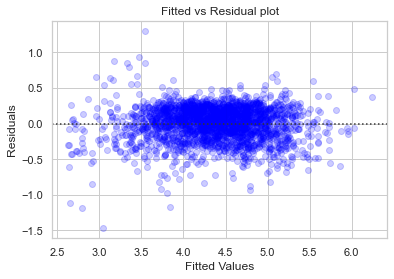

In [35]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color='blue', scatter_kws={"alpha": 0.2}
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations
- Because the graph above shows no real pattern we can say that the model is linear and the residuals are independent and move on to our next test.

### Normaility Test 
- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

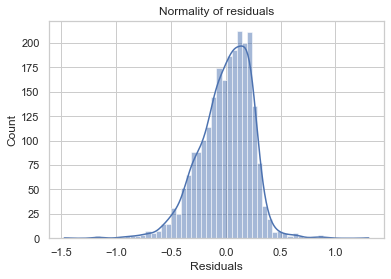

In [36]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

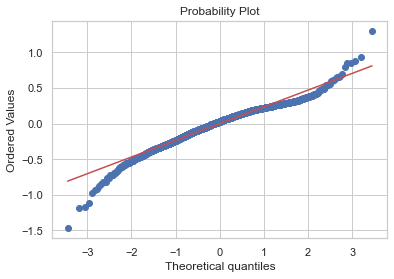

In [37]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) 
plt.show()

In [38]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.966823935508728, pvalue=3.838614204200996e-23)

#### Observations
- Residuals appear to have an approx normal distribution
- Residuals create an approx straight line with QQ plot
- Residuals return p-value < 0.05 but due to the visuals we are going to consider them normally distributed despite this. 

### Homoscedasticity Test 
- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [39]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.1294098191096402), ('p-value', 0.01772332919909085)]

#### Observations
- Our Goldfeldquandt test yielded a p-value lower than 0.05 indicating our residuals are unfortunately heteroscedastic.

#### Observations
- Our calculated p-value was far above 0.05 therefore we can say that our residuals are homoscedastic.

## Final Model

In [40]:
olsmodel_final = sm.OLS(y_train, x_train5).fit() 
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1564.
Date:                   Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                           18:50:51   Log-Likelihood:                 28.451
No. Observations:                   2410   AIC:                            -38.90
Df Residuals:                       2401   BIC:                             13.19
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [41]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train5, y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239131,0.186151,0.838997,0.838393,4.497264


In [42]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test5, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232069,0.181712,0.836929,0.835496,4.342235


#### Observations
- This model explains 84% of the data.
- The train and test RMSE and MAE are very close to the same and are low so ther isnt overfitting in our model.
- The MAPE says we can predict withing 4.3% of the normalized used phone price
- this model is good for prediction and inference

## Actionable Insights and Recommendations 

- Because the model explains 85% of the data and MAPE states it can predict withing 4.3% we can conclude that this model is useful for prediction and inference.
- if screen_size is increased by 1 unit then the normalized used price increases by 0.045, assuming all other variables are held constant.
- If the screen size is increased by 1 unit, then the normalized used price increases by 0.045, assuming all other variables are held constant.
- If the main camera megapixels are increased by 1 unit, then the normalized used price increases by 0.0192, assuming all other variables are held constant.
- If the selfie camera megapixels are increased by 1 unit, then the normalized used price increases by 0.0144, assuming all other variables are held constant.
- If the RAM (Random Access Memory) is increased by 1 unit, then the normalized used price increases by 0.0199, assuming all other variables are held constant.
- If the normalized new price is increased by 1 unit, then the normalized used price increases by 0.4205, assuming all other variables are held constant.
- If the phone has 4G connectivity, then the normalized used price increases by 0.0819, assuming all other variables are held constant.

- A final step that would be interesting to see is to use this model in the real world. Can it accurately predict the price of a used phone?  While we split our data into train and test, I would recommend the stakeholders attempt to sell used phone using this model as a means of testing it against other data. A used electronics store could take the 'screen_size', 'main_camera_mp', 'ram', etc of the devices they buy, then use the coeffecients in the model above to calculate what the price should be in their used device section. Would this model truely calculate a fair price in the real world? 

- I think this analysis and model would be more useful when looking at more granular data, such as used phone data for only one brand.  Many of the brands included in this dataset only have a few values to go off and therefore we cant be sure that these samples accurately represent the sales value of that brand.  If we could collect or find an existing dataset with more data on each brand, we could build pricing models for each brand that would likely be more accurate than this model for the industry as a whole. 

___